# PAP DATASET

In [1]:
import os, ast

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# List all existing files in "dataset"
base_directory = "/mount/studenten/semantic-plausibility/datasets/pap"

# walkthrough the directory and its subdirs
for root, dirs, files in os.walk(base_directory):
    for file in files:
        print(root)
        print(file)

/mount/studenten/semantic-plausibility/datasets/pap/additional-resources/eichel-ssiw-2023
Amendment.pdf
/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations
README.md
/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations
dataset.tsv
/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations/mace_aggregations
aggregated_predictions.tsv
/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations/mace_aggregations
2-class-dist.prediction
/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations/mace_aggregations
4-class-dist.prediction
/mount/studenten/semantic-plausibility/datasets/pap/train-dev-test-split
README.md
/mount/studenten/semantic-plausibility/datasets/pap/train-dev-test-split/multiclass
train.csv
/mount/studenten/semantic-plausibility/datasets/pap/train-dev-test-split/multiclass
dev.csv
/mount/studenten/semantic-plausibility/datasets/pap/train-dev-test-split/multiclass
test.csv
/mount/studenten/semantic-plausibility/data

### Raw annotation

In [3]:
raw_data_fp = "/mount/studenten/semantic-plausibility/datasets/pap/raw-annotations/dataset.tsv"

In [4]:
raw_df = pd.read_csv(raw_data_fp, sep='\t')
raw_df.dtypes

event                       object
original_label              object
abstractness_combination    object
rating                      object
majority_multiclass         object
distribution_multiclass     object
majority_binary             object
distribution_binary         object
dtype: object

In [5]:
# convert the string representation to actual numerical representation
lists = ['rating', 'distribution_multiclass', 'distribution_binary']
raw_df[lists] = raw_df[lists].map(lambda x: ast.literal_eval(x.strip()))
raw_df.describe()


,event,original_label,abstractness_combination,rating,majority_multiclass,distribution_multiclass,majority_binary,distribution_binary
count,1733,1733,1733,1733,1733,1733,1733,1733
unique,1733,2,27,1708,2,409,3,33
top,ability means mobility,implausible,m-a-a,"[5, 5, 5, 4, 4, 5, 4, 5, 5]",unsure,"[0.0, 0.0, 50.0, 50.0]",1,"[100.0, 0.0]"
freq,1,871,72,3,1667,23,931,159


### Basic statistics
Some basic statistics of the dataset could be observed from above.
* Number of events: 1733 (no missing data)
* Number of original labels: 2 (almost perfectly balanced, with 871 implausible)
* Number of unique abstractness combination: 27
* For multiclass based on majority ratings, there are a significant amount of unsure class (1677/1733)
* For binary class based on majority ratings, there are much more events rated as plausible (931/1733)
* Number of events where all annotators agree 100%: 159


In [6]:
# look at the first 10 rows
raw_df.head(10)

,event,original_label,abstractness_combination,rating,majority_multiclass,distribution_multiclass,majority_binary,distribution_binary
0,ability means mobility,plausible,a-m-a,"[2, 5, 4, 5, 5, 2, 5, 5, 5, 5]",5,"[0.0, 20.0, 10.0, 70.0]",1,"[80.0, 20.0]"
1,ability permits multiplication,plausible,a-c-m,"[5, 5, 5, 5, 4, 5, 5, 4]",5,"[0.0, 0.0, 25.0, 75.0]",1,"[100.0, 0.0]"
2,access diminishes power,plausible,a-m-a,"[4, 2, 5, 5, 5, 4, 4, 2, 4]",unsure,"[0.0, 22.22222222222222, 44.44444444444444, 33...",1,"[77.77777777777779, 22.22222222222222]"
3,achievement reaches community,plausible,a-c-m,"[1, 4, 1, 4, 5, 4, 5, 4, 5, 4]",unsure,"[20.0, 0.0, 50.0, 30.0]",1,"[80.0, 20.0]"
4,acquisition casts glance,plausible,a-c-m,"[4, 5, 4, 4, 4, 4, 1, 2]",unsure,"[12.5, 12.5, 62.5, 12.5]",1,"[75.0, 25.0]"
5,action catches interest,plausible,a-c-a,"[4, 4, 4, 4, 5, 5, 5, 4]",unsure,"[0.0, 0.0, 62.5, 37.5]",1,"[100.0, 0.0]"
6,advance decreases time,plausible,a-m-m,"[1, 5, 4, 5, 5, 2, 5, 4, 4]",unsure,"[11.11111111111111, 11.11111111111111, 33.3333...",1,"[77.77777777777779, 22.22222222222222]"
7,advance guarantees freedom,plausible,a-a-a,"[4, 4, 2, 4, 4, 2, 4, 2, 4]",unsure,"[0.0, 33.33333333333333, 66.66666666666666, 0.0]",unsure,"[66.66666666666666, 33.33333333333333]"
8,advantage leads state,plausible,a-c-m,"[5, 4, 4, 4, 4, 4, 4, 1]",unsure,"[12.5, 0.0, 75.0, 12.5]",1,"[87.5, 12.5]"
9,advantage outweighs risk,plausible,a-m-a,"[4, 4, 5, 5, 2, 4, 4, 4, 1]",unsure,"[11.11111111111111, 11.11111111111111, 55.5555...",1,"[77.77777777777779, 22.22222222222222]"


In average, there are 8.98 ratings for each event; all events have at least 8 ratings, there are some events with 12 ratings.

In [7]:
raw_df['number_ratings'] = raw_df['rating'].apply(len)
raw_df['number_ratings'].describe()

count    1733.000000
mean        8.984997
std         0.811867
min         8.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        12.000000
Name: number_ratings, dtype: float64

In [8]:
raw_df["abstractness_combination"].describe()

count      1733
unique       27
top       m-a-a
freq         72
Name: abstractness_combination, dtype: object

Of the 27 abstractness combinations, the most common triple is of the type "m-a-a", with 72 triplets. As can be seen from the graph belows, the distribution of labels are almost balanced among abstractness combination. The the least common triples are "a-m-a" and "m-m-a", with almost 60 triples for each type.

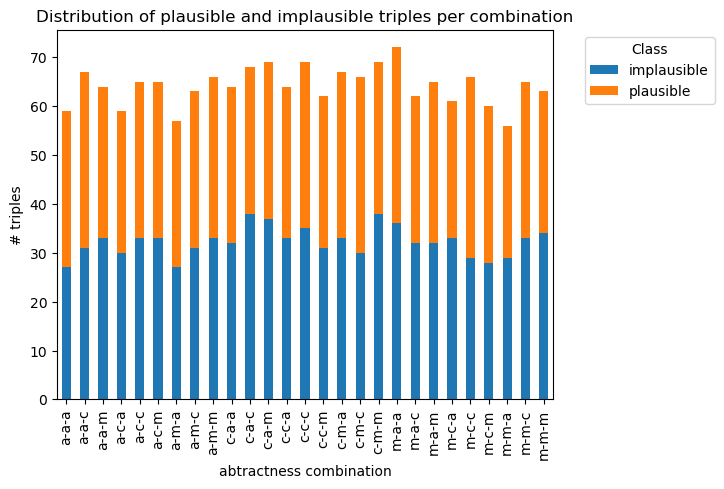

In [9]:
# count the number of each abstractness combination
combi_df = raw_df.groupby(["abstractness_combination","original_label"]).size().unstack()

# Plotting stacked bar chart
ax = combi_df.plot(kind='bar', stacked=True)
plt.xlabel("abtractness combination")
plt.ylabel("# triples")
plt.title("Distribution of plausible and implausible triples per combination")

# moving the legen outside the plot area
ax.legend(title='Class', bbox_to_anchor=(1.05,1), loc='upper left')

For ease of visualization, we aggregate all individual ratings as average median rating per triples. The mean of median rating is 3.7, showing a tendency for average plausibility.

In [10]:
raw_df['average_ratings'] = raw_df['rating'].apply(pd.Series).median(axis=1)
raw_df['average_ratings'].describe()

count    1733.000000
mean        3.786786
std         0.957367
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: average_ratings, dtype: float64

In [11]:
# count the number of each rating 
rating_df = raw_df.groupby(["original_label","average_ratings"]).size().unstack().fillna(0)
rating_df

average_ratings,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
original_label,,,,,,,,,
implausible,27.0,20.0,157.0,9.0,82.0,0.0,508.0,37.0,31.0
plausible,6.0,5.0,38.0,4.0,36.0,1.0,451.0,101.0,220.0


As the belowed graph shows, there are a large amount of triples rated as {4, 5}, showing that the ratings are skewed towards "plausible". 
Of the pseudo-implausible class, there are 157 triples rated as "weakly implausible"; while there are 451 triples that were attested in the corpus and also rated as "plausible". 
More notably, there are nearly 550 pseudo-implausible triples rated as "plausible" or "highly plausible" (ratings in [4,5])

<Axes: xlabel='average_ratings', ylabel='original_label'>

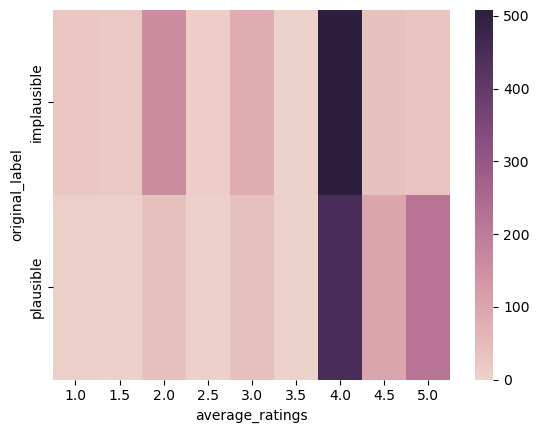

In [12]:
sns.heatmap(rating_df, cmap=sns.cubehelix_palette(as_cmap=True))